In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df_train = pd.read_csv('train.csv', index_col=[0])
df_test = pd.read_csv('test.csv', index_col=[0])
greeks = pd.read_csv('greeks.csv')
greeks = greeks[['Id','Alpha']].set_index('Id')

df_train['EJ'] = df_train['EJ'].replace({'A': 0, 'B': 1})
df_test['EJ']  = df_test['EJ'].replace({'A': 0, 'B': 1})

data = pd.concat([df_train.drop("Class",axis=1), greeks.Alpha], axis=1)
data_encoded = data.drop('Alpha',axis=1).join(pd.get_dummies(data.Alpha))

In [217]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df_train.drop('Class',axis=1))
scaled_df = pd.DataFrame(data=scaled_data, columns=df_train.drop('Class',axis=1).columns, index=df_train.index)
scaled_df.head(2)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.038354,-0.405383,...,-2.226608,0.162355,-0.035806,-0.250462,-0.940094,-0.41026,-0.655511,-0.948991,0.531241,-0.815091
007255e47698,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,-0.104787,0.048541,...,0.084542,-0.457909,-0.060566,0.113034,-1.145070,-0.41026,0.687893,-0.238862,-0.509218,1.303181


In [225]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=4, weights="uniform")
data_imputed = imputer.fit_transform(scaled_df)
final_df = pd.DataFrame(data=data_imputed, columns=scaled_df.columns, index = scaled_df.index)
y = df_train.Class

In [224]:
final_df.head(2)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.038354,-0.405383,...,-2.226608,0.162355,-0.035806,-0.250462,-0.940094,-0.41026,-0.655511,-0.948991,0.531241,-0.815091
007255e47698,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,-0.104787,0.048541,...,0.084542,-0.457909,-0.060566,0.113034,-1.145070,-0.41026,0.687893,-0.238862,-0.509218,1.303181


In [231]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [226]:
X_train,X_test,y_train,y_test = train_test_split(final_df,y,random_state=42,stratify=y)

In [229]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            early_stopping_rounds=10,
                            eval_metric='aucpr',
                            seed=42) 
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.60582
[1]	validation_0-aucpr:0.74022
[2]	validation_0-aucpr:0.66443
[3]	validation_0-aucpr:0.74926
[4]	validation_0-aucpr:0.73795
[5]	validation_0-aucpr:0.73251
[6]	validation_0-aucpr:0.73224
[7]	validation_0-aucpr:0.73381
[8]	validation_0-aucpr:0.77914
[9]	validation_0-aucpr:0.78696
[10]	validation_0-aucpr:0.78943
[11]	validation_0-aucpr:0.80653
[12]	validation_0-aucpr:0.79976
[13]	validation_0-aucpr:0.79324
[14]	validation_0-aucpr:0.79701
[15]	validation_0-aucpr:0.79971
[16]	validation_0-aucpr:0.80535
[17]	validation_0-aucpr:0.80737
[18]	validation_0-aucpr:0.79531
[19]	validation_0-aucpr:0.80309
[20]	validation_0-aucpr:0.80240
[21]	validation_0-aucpr:0.80138
[22]	validation_0-aucpr:0.78233
[23]	validation_0-aucpr:0.77553
[24]	validation_0-aucpr:0.78142
[25]	validation_0-aucpr:0.79248
[26]	validation_0-aucpr:0.79383


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

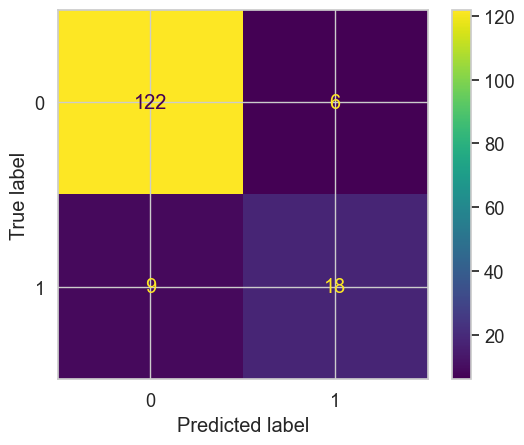

In [232]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,
                      X_test,
                      y_test)

In [245]:
param_grid = {
     'max_depth':  [3,4,5,6,7,8,9,10,11,12,13,14,15],
     'learning_rate': [0.1,0.01,0.05],
     'gamma': [0,0.25,1.0],
     'reg_lambda': [0,1.0,10.0],
     'scale_pos_weight': [1,3,5]
 }

# #2nd round
param_grid = {
     'max_depth':  [2,3,4,5,6,7,8,9,10],
     'learning_rate': [0.1,0.05,0.01],
     'gamma': [0,0.25,0.5,0.75,1.0],
     'reg_lambda': [5.0,10.0],
     'scale_pos_weight': [4.0,5.0],
     'n_estimators': [50,60,70,80,90,100]
 }

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                early_stopping_rounds=10,
                                eval_metric='auc'), 
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=2, 
    n_jobs=10,
    cv=5
)

optimal_params.fit(X_train,
                   y_train,
                   eval_set=[(X_test,y_test)],
                   verbose=False)

print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 10.0, 'scale_pos_weight': 4.0}


In [274]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            gamma=0.25, 
                            seed=42,
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1.,
                            scale_pos_weight=5.0,
                            n_estimators=100) 
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

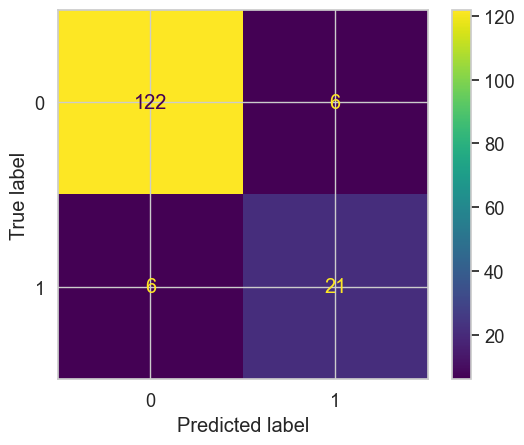

In [275]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,
                      X_test,
                      y_test)

In [277]:
sample_submission = pd.read_csv('sample_submission.csv')

In [283]:
from sklearn.preprocessing import StandardScaler

scaled_test = StandardScaler().fit_transform(df_test)
scaled_test = pd.DataFrame(data=scaled_test, columns=df_test.columns, index=df_test.index)
scaled_test.head(2)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=4, weights="uniform")
test_imputed = imputer.fit_transform(scaled_test)
test_final = pd.DataFrame(data=test_imputed, columns=scaled_test.columns, index = scaled_test.index)
test_final.head(2)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Id,,,,,,,,,,,,,,,,,,,,,
00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
prob = clf_xgb.predict(test_final)


In [307]:
sample_submission['class_1'] = prob
sample_submission['class_0'] = 1 - prob

In [308]:
sample_submission.to_csv('submission.csv')

,Id,class_0,class_1
0,00eed32682bb,1,0
1,010ebe33f668,1,0
2,02fa521e1838,1,0
3,040e15f562a2,1,0
4,046e85c7cc7f,1,0


# 2nd draft

In [364]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#1. Scale and center the data
# We scale it because like if one axis has unit of millions and another axis has unit of hundreds, 
# the graph will become very skewed and PCA won't work well
scaled_data = StandardScaler().fit_transform(final_df)

#2. PCA
pca = PCA(n_components=10) #extract 10 most important component
#pca = PCA(n_components=0.95) -> get 95% variance 
#noted that the less components there are, the faster the training and lower the accuracy
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

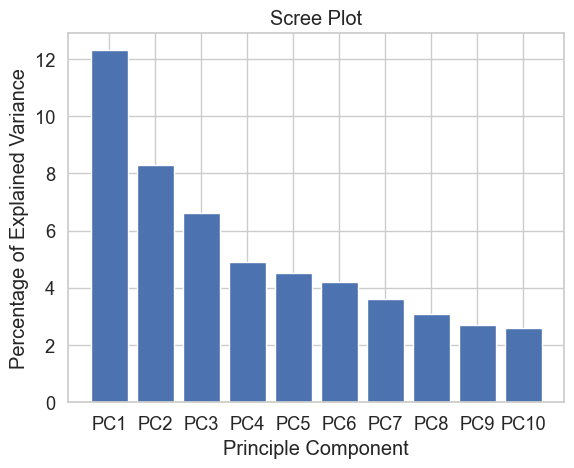

In [365]:
#3. Scree Plot
#pca.explained_variance_ratio_ return an array that show how much useful information (variance) each PC captured
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.xlabel('Principle Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.show()

In [355]:
#loading score
loading_scores = pd.Series(pca.components_[0],index=final_df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_genes])


AH    0.321421
EB    0.315050
AR    0.314119
DV    0.297492
CH    0.296914
CS    0.291677
CL    0.282646
EP    0.275409
AB    0.173187
BZ    0.171217
dtype: float64


In [358]:
len(pca_data)

617

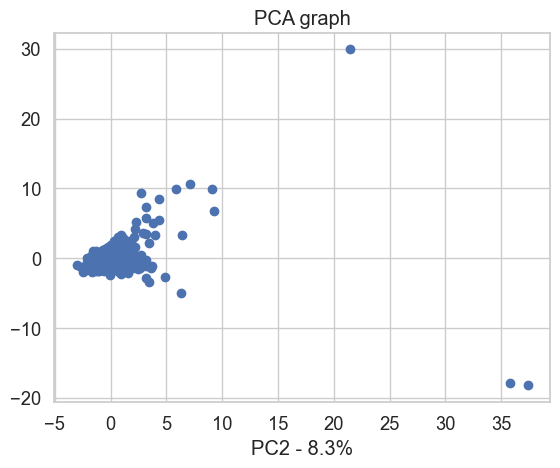

In [360]:
#4. PCA graph
pca_df = pd.DataFrame(pca_data,index=final_df.index,columns=labels)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.xlabel('PC2 - {0}%'.format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

plt.show()

In [369]:
pca.singular_values_

array([65.23403532, 53.5446103 , 47.79968241, 41.33700156, 39.43448349,
       37.95204487, 35.39609766, 32.47132034, 30.52935869, 30.23038574])